In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

sys.path.append("../..")

In [3]:
import nucml.datasets as nuc_data
import nucml.ensdf.plotting_utilities as ensdf_plot

In [7]:
import importlib
importlib.reload(nuc_data)

<module 'nucml.datasets' from '../..\\nucml\\datasets.py'>

# Reading ENSDF Data 

In [8]:
ensdf_df = nuc_data.load_ensdf(append_ame=True)
ensdf_cutoff_df = nuc_data.load_ensdf(cutoff=True, append_ame=True)

INFO:root:Reading data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\ENSDF\CSV_Files/ensdf.csv
INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:\Users\Pedro\Desktop\ML_Nuclear_Data\AME\CSV_Files\AME_all_merged_no_NaN.csv
INFO:root:Reading data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\ENSDF\CSV_Files/ensdf_cutoff.csv
INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:\Users\Pedro\Desktop\ML_Nuclear_Data\AME\CSV_Files\AME_all_merged_no_NaN.csv


In [10]:
ensdf_df[ensdf_df.Element_w_A == "234Np"]

,Level_Number,Energy,Spin,Parity,Half_Life,Gammas,Flag,ENSDF_Spin,Num_Decay_Modes,Decay_Info,Element_w_A,N,Z,A,EL,O,Mass_Excess,dMass_Excess,Binding_Energy,dBinding_Energy,B_Decay_Energy,dB_Decay_Energy,Atomic_Mass_Micro,dAtomic_Mass_Micro,S(2n),dS(2n),S(2p),dS(2p),Q(a),dQ(a),Q(2B-),dQ(2B-),Q(ep),dQ(ep),Q(B-n),dQ(B-n),S(n),dS(n),S(p),dS(p),Q(4B-),dQ(4B-),"Q(d,a)","dQ(d,a)","Q(p,a)","dQ(p,a)","Q(n,a)","dQ(n,a)","Q(g,p)","Q(g,n)","Q(g,pn)","Q(g,d)","Q(g,t)","Q(g,He3)","Q(g,2p)","Q(g,2n)","Q(g,a)","Q(p,n)","Q(p,2p)","Q(p,pn)","Q(p,d)","Q(p,2n)","Q(p,t)","Q(p,3He)","Q(n,2p)","Q(n,np)","Q(n,d)","Q(n,2n)","Q(n,t)","Q(n,3He)","Q(d,t)","Q(d,3He)","Q(3He,t)","Q(3He,a)","Q(t,a)"
70460,1,0.0,0.0,1,380200.0,0,NaN,(0+),1,= 1.0000E+02 %EC+%B+ ...,234Np,141,93,234,Np,-,39954.871,8.397,7589.637,0.036,-395.1,10.752,2.340429e+08,9.014,13547.0,100.0,10569.7,11.26,5356.35,8.81,-4506.0,159.0,-4823.57,8.36,-8168.22,51.04,6065.04,51.65,4253.27,8.56,-13501.0,143.0,16056.15,8.47,11012.91,8.69,12176.87,8.45,-4253.27,-6065.04,-10014.9439,-7790.3779,-8800.9549,-8400.7494,-10569.7,-13547.0,5356.35,-1177.4465,-4253.27,-6065.04,-3840.474,-8950.5665,-5065.2051,-2296.9035,-4041.2235,-4253.27,-2028.704,-6065.04,-1533.1489,-2851.6596,192.189,1240.2044,-413.692,14512.5794,15560.5949


# Exploratory Data Analysis

Let us study the dataset and analyze the distributions.

In [11]:
# Specifying directory to save figures
figure_dir = "Figures/"

In [14]:
basic_cols = ["Level_Number", "Energy", "Z", "N", 
              "Atomic_Mass_Micro", "Element_w_A"]

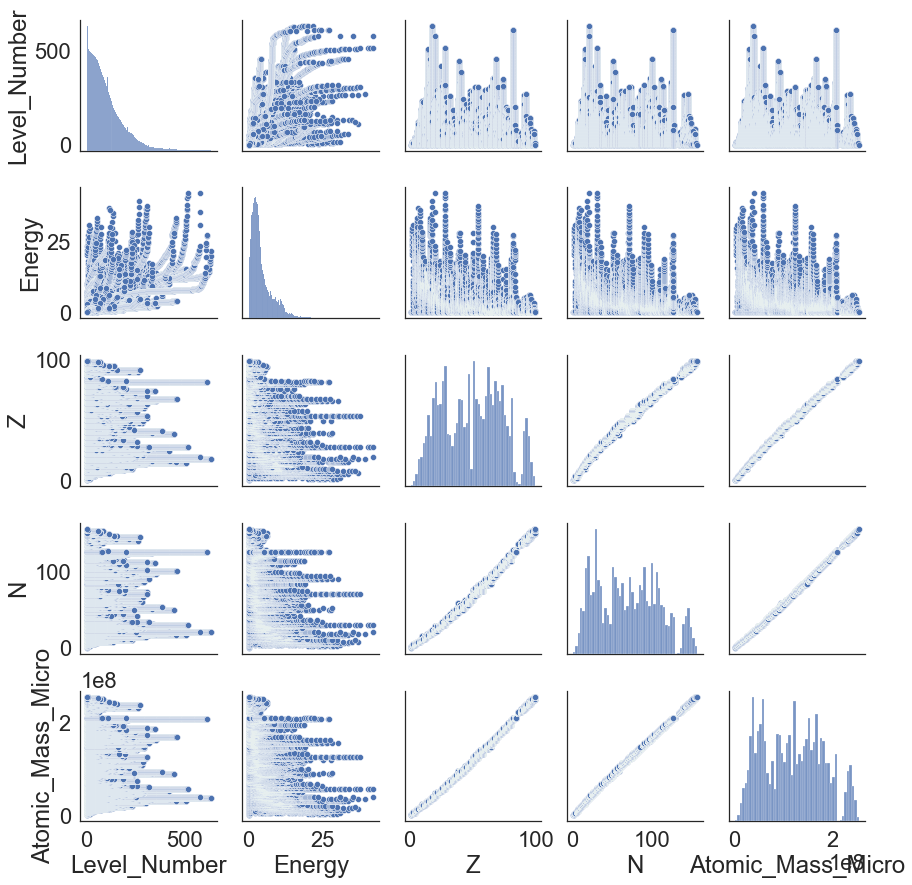

In [15]:
sns.pairplot(ensdf_df[basic_cols])
plt.savefig(os.path.join(figure_dir, 'ENSDF_Pairplot.png'), transparent=False)

# Isotope Energy Distribution

In [16]:
sns.set(font_scale = 2)
sns.set_style("white")

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


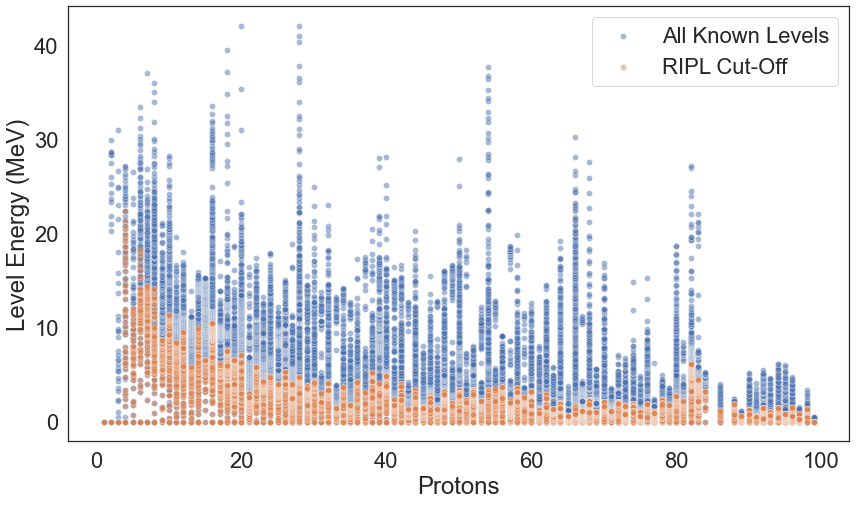

In [30]:
plt.figure(figsize=(14, 8))
sns.scatterplot(ensdf_df.Z, ensdf_df.Energy, alpha=0.5, label="All Known Levels")
sns.scatterplot(ensdf_cutoff_df.Z, ensdf_cutoff_df.Energy, alpha=0.5, label="RIPL Cut-Off")
plt.ylabel("Level Energy (MeV)")
plt.xlabel("Protons")
plt.savefig(os.path.join(figure_dir, 'ENSDF_Z_E.png'), transparent=False, bbox_inches='tight', dpi=600)

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


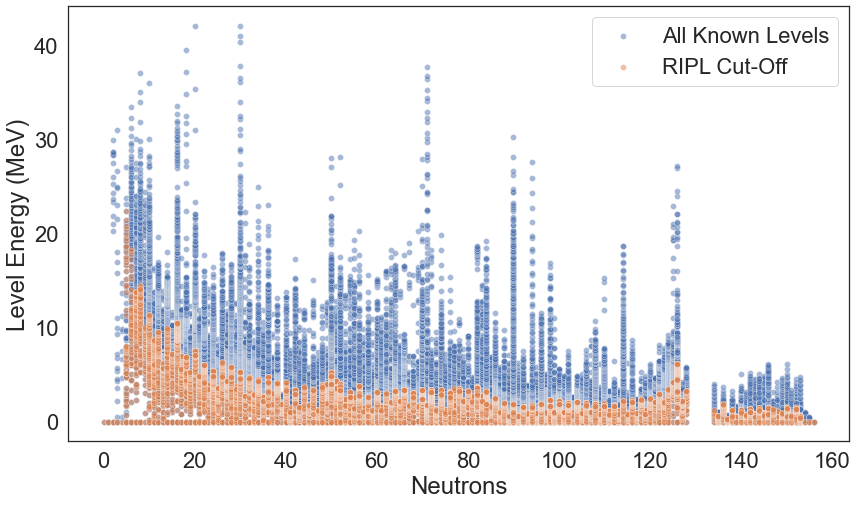

In [29]:
plt.figure(figsize=(14, 8))
sns.scatterplot(ensdf_df.N, ensdf_df.Energy, alpha=0.5, label="All Known Levels")
sns.scatterplot(ensdf_cutoff_df.N, ensdf_cutoff_df.Energy, alpha=0.5, label="RIPL Cut-Off")
plt.ylabel("Level Energy (MeV)")
plt.xlabel("Neutrons")
plt.savefig(os.path.join(figure_dir, 'ENSDF_N_E.png'), transparent=False, bbox_inches='tight', dpi=600)

# Isotopes Statistics


In [21]:
# cat_cols_plot = ["Target_Element_w_A"]
# for i in cat_cols_plot:
#     plt.figure(figsize=(10, 8))
#     sns.catplot(x=i, kind="count", data=ensdf_cutoff_df, 
#             order=ensdf_cutoff_df[i].value_counts().iloc[:8].index, 
#             palette="deep", height=10, aspect=2);
#     plt.xlabel("Isotope")
#     plt.ylabel("# of Known Levels")
#     plt.savefig(os.path.join(figure_dir, 'ENSDF_{}.png'.format(i)), bbox_inches='tight', dpi=300)

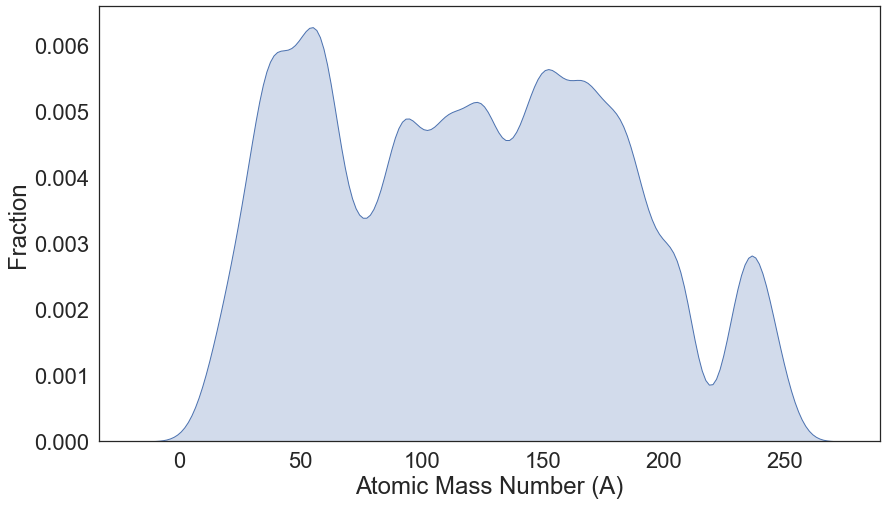

In [25]:
plt.figure(figsize=(14,8))
g = sns.kdeplot(ensdf_df.A, shade=True);
g.set(xlabel="Atomic Mass Number (A)", ylabel="Fraction")
plt.savefig(os.path.join(figure_dir, 'ENSDF_Atomic_Mass_Dist.png'), bbox_inches='tight', dpi=600)

# Energy Distribution

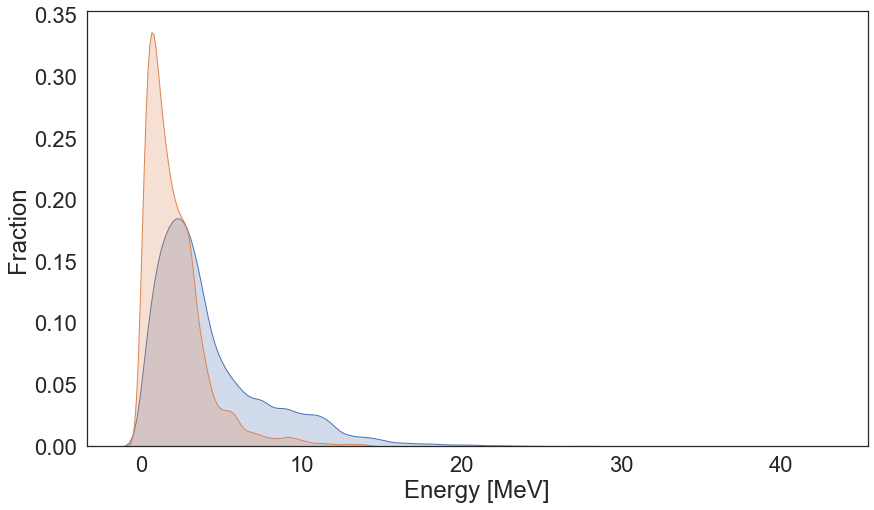

In [31]:
plt.figure(figsize=(14, 8))
sns.kdeplot(ensdf_df.Energy.values, shade=True, label="All Known Levels");
sns.kdeplot(ensdf_cutoff_df.Energy.values, shade=True, label='RIPL Cut-Off');
plt.xlabel("Energy [MeV]")
plt.ylabel("Fraction")
plt.savefig(os.path.join(figure_dir, 'ENSDF_E_Dist.png'), bbox_inches='tight', dpi=600)

# Level Distribution

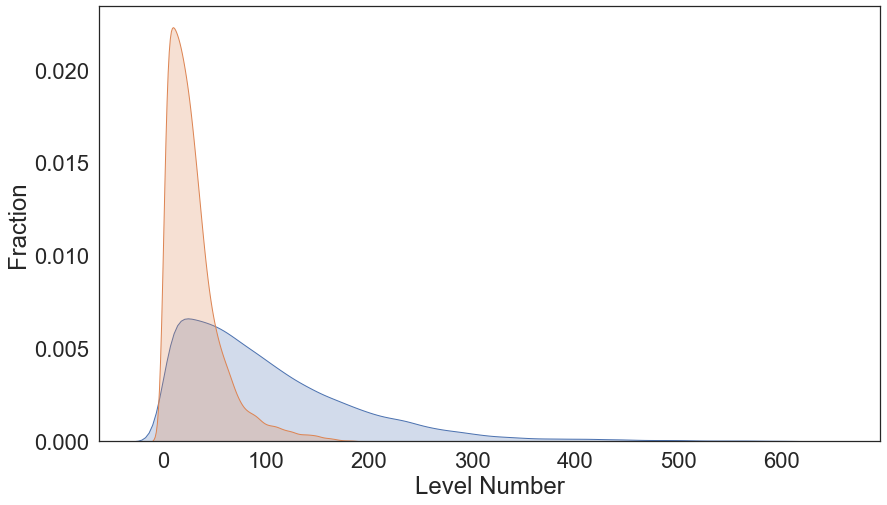

In [32]:
plt.figure(figsize=(14,8))
sns.kdeplot(ensdf_df.Level_Number.values, shade=True, label="All Known Levels");
sns.kdeplot(ensdf_cutoff_df.Level_Number.values, shade=True, label="RIPL Cut-Off");
plt.xlabel("Level Number")
plt.ylabel("Fraction")
plt.savefig(os.path.join(figure_dir, 'ENSDF_L_Dist.png'), bbox_inches='tight', dpi=600)

# Energy vs Level Number

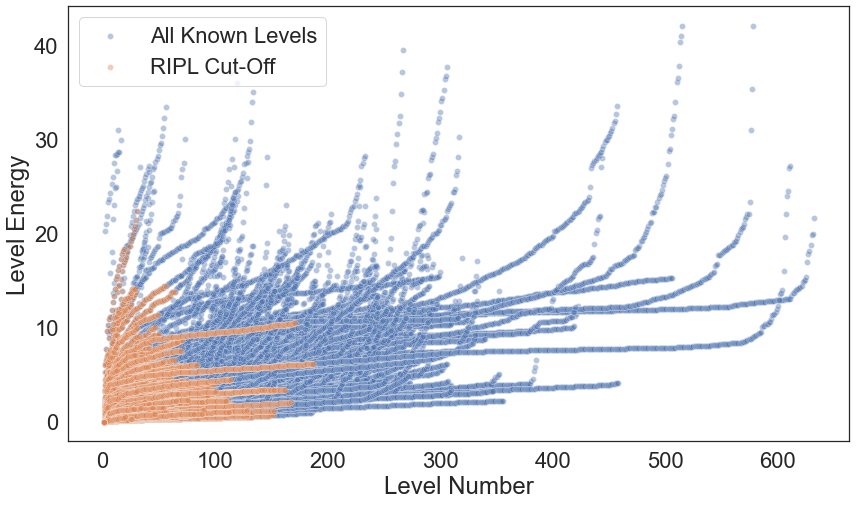

In [34]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Level_Number', y='Energy', data=ensdf_df, alpha=0.4, label="All Known Levels")
sns.scatterplot(x='Level_Number', y='Energy', data=ensdf_cutoff_df, alpha=0.4, label="RIPL Cut-Off")
plt.xlabel("Level Number")
plt.ylabel("Level Energy")
plt.savefig(os.path.join(figure_dir, 'ENSDF_E_vs_L.png'), bbox_inches='tight', dpi=600)

# Uranium and Chlorine Energy Distribution

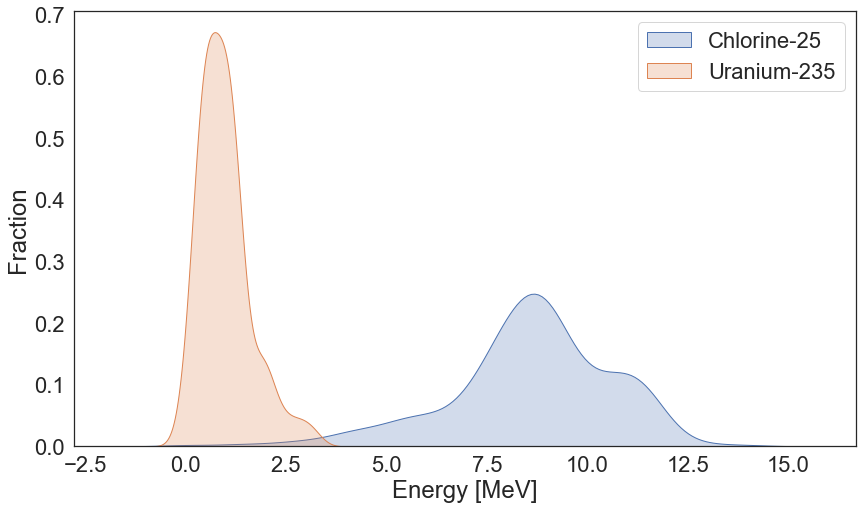

In [36]:
plt.figure(figsize=(14, 8))
chlorine = ensdf_df[ensdf_df.Element_w_A == "35Cl"]
uranium = ensdf_df[ensdf_df.Element_w_A == "233U"]
sns.kdeplot(chlorine.Energy.values, shade=True, label="Chlorine-25");
sns.kdeplot(uranium.Energy.values, shade=True, label='Uranium-235');
plt.xlabel("Energy [MeV]")
plt.ylabel("Fraction")
plt.legend()
plt.savefig(os.path.join(figure_dir, 'ENSDF_Cl_U_E_Dist.png'), bbox_inches='tight', dpi=600)

# Plotting Utilities: Level and Level Density

In [66]:
importlib.reload(ensdf_plot)

<module 'nucml.ensdf.plotting_utilities' from '../..\\nucml\\ensdf\\plotting_utilities.py'>

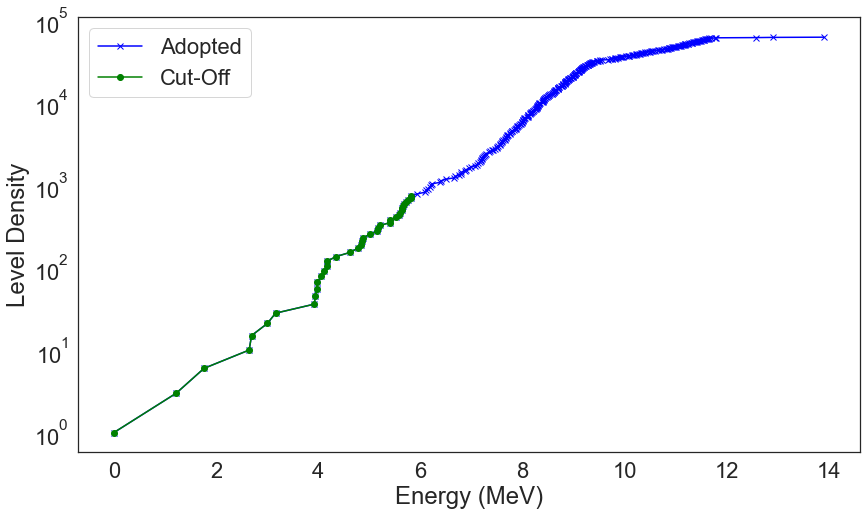

In [67]:
ensdf_plot.plot_level_density(ensdf_df, 17, 35, df2=ensdf_cutoff_df, save=True, save_dir=figure_dir)

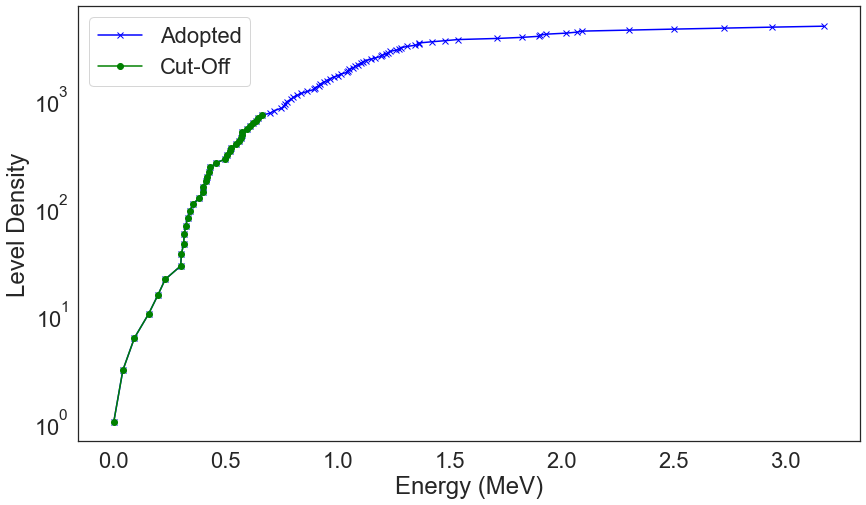

In [68]:
ensdf_plot.plot_level_density(ensdf_df, 92, 233, df2=ensdf_cutoff_df, save=True, save_dir=figure_dir)

# Numerical Features

Lets follow up with the Chlorine-35 (n,p) example.

We can explor correlation among features but as we know beforehand, cross section do not behave linearly. Let us use the chlorine 35 n,p cross sections as an example.

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [71]:
from scipy import stats

In [70]:
def pearson_corr(protons, neutrons, df):
    to_plot = df[(df["Protons"] == protons) & (df["Neutrons"] == neutrons)].sort_values(
        by='Level_Number', ascending=True)
    pearson_coef, p_value = stats.pearsonr(to_plot['Level_Number'], to_plot['Level_Energy'])
    print("Results for {}:".format(to_plot.Element_w_A.iloc[0]))
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [65]:
chlorine = df[df.Element_w_A == "35Cl"].sort_values(by='Level_Number', ascending=True)
uranium = df[df.Element_w_A == "235U"].sort_values(by='Level_Number', ascending=True)

In [66]:
chlorine.describe()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
count,352.000000,352.000000,352.0,352.0,352.0,352.0
mean,176.500000,8.579085,17.0,18.0,35453000.0,35.0
std,101.757883,2.029201,0.0,0.0,0.0,0.0
min,1.000000,0.000000,17.0,18.0,35453000.0,35.0
25%,88.750000,7.691525,17.0,18.0,35453000.0,35.0
50%,176.500000,8.734000,17.0,18.0,35453000.0,35.0
75%,264.250000,9.877750,17.0,18.0,35453000.0,35.0
max,352.000000,13.900000,17.0,18.0,35453000.0,35.0


In [68]:
pd.DataFrame(chlorine.corr()).sort_values(by='Level_Energy', ascending=False).head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
Level_Energy,0.939196,1.000000,NaN,NaN,NaN,NaN
Level_Number,1.000000,0.939196,NaN,NaN,NaN,NaN
Protons,NaN,NaN,NaN,NaN,NaN,NaN
Neutrons,NaN,NaN,NaN,NaN,NaN,NaN
Atomic_Mass_Micro,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
pearson_corr(17, 35-17, df2)

Results for 35Cl:
The Pearson Correlation Coefficient is 0.9020790472746514  with a P-value of P = 1.0588253532475289e-14


In [67]:
uranium.describe()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
count,152.000000,152.000000,152.0,152.0,1.520000e+02,152.0
mean,76.500000,0.981113,92.0,143.0,2.350439e+08,235.0
std,44.022721,0.678888,0.0,0.0,2.990084e-08,0.0
min,1.000000,0.000000,92.0,143.0,2.350439e+08,235.0
25%,38.750000,0.614320,92.0,143.0,2.350439e+08,235.0
50%,76.500000,0.898620,92.0,143.0,2.350439e+08,235.0
75%,114.250000,1.162983,92.0,143.0,2.350439e+08,235.0
max,152.000000,4.043000,92.0,143.0,2.350439e+08,235.0


In [69]:
pd.DataFrame(uranium.corr()).sort_values(by='Level_Energy', ascending=False).head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
Level_Energy,0.848441,1.000000e+00,NaN,NaN,-3.626947e-16,NaN
Level_Number,1.000000,8.484415e-01,NaN,NaN,0.000000e+00,NaN
Atomic_Mass_Micro,0.000000,-3.626947e-16,NaN,NaN,1.000000e+00,NaN
Protons,NaN,NaN,NaN,NaN,NaN,NaN
Neutrons,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
pearson_corr(92, 235-92, df2)

Results for 235U:
The Pearson Correlation Coefficient is 0.9892727082915095  with a P-value of P = 2.784416965803747e-44


The energy is weakley linearly correlated. The p-value results in 1% confidence that this correlation is significant. We therefore expect that a linear model will work poorly in this data. As a nuclear engineer, we know that there are depedences on Energy depending on the region. One solution could be to split the data into the appropiate energy ranges but that would defeat the purpose of this project.

In [75]:
num_columns = []
for col in list(df.columns):
    if col not in str_cols:
        num_columns.append(col)